In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import pyfstat
from os import listdir
from os.path import isfile, join



22-11-02 14:31:12.543 pyfstat INFO    : Running PyFstat version 1.18.1+1.73ad1acd.clean


In [2]:
mypath    = "/Users/nestrada/Downloads/g2net-detecting-continuous-gravitational-waves/train/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]




file: d36cd3273.hdf5
h1_sfts: 4577 arrays made of 360 complex numbers each one
h1_tgps: 4577 real numbers
l1_sfts: 4672 arrays made of 360 complex numbers each one
l1_tgps: 4672 real numbers
frequency: 360 real numbers


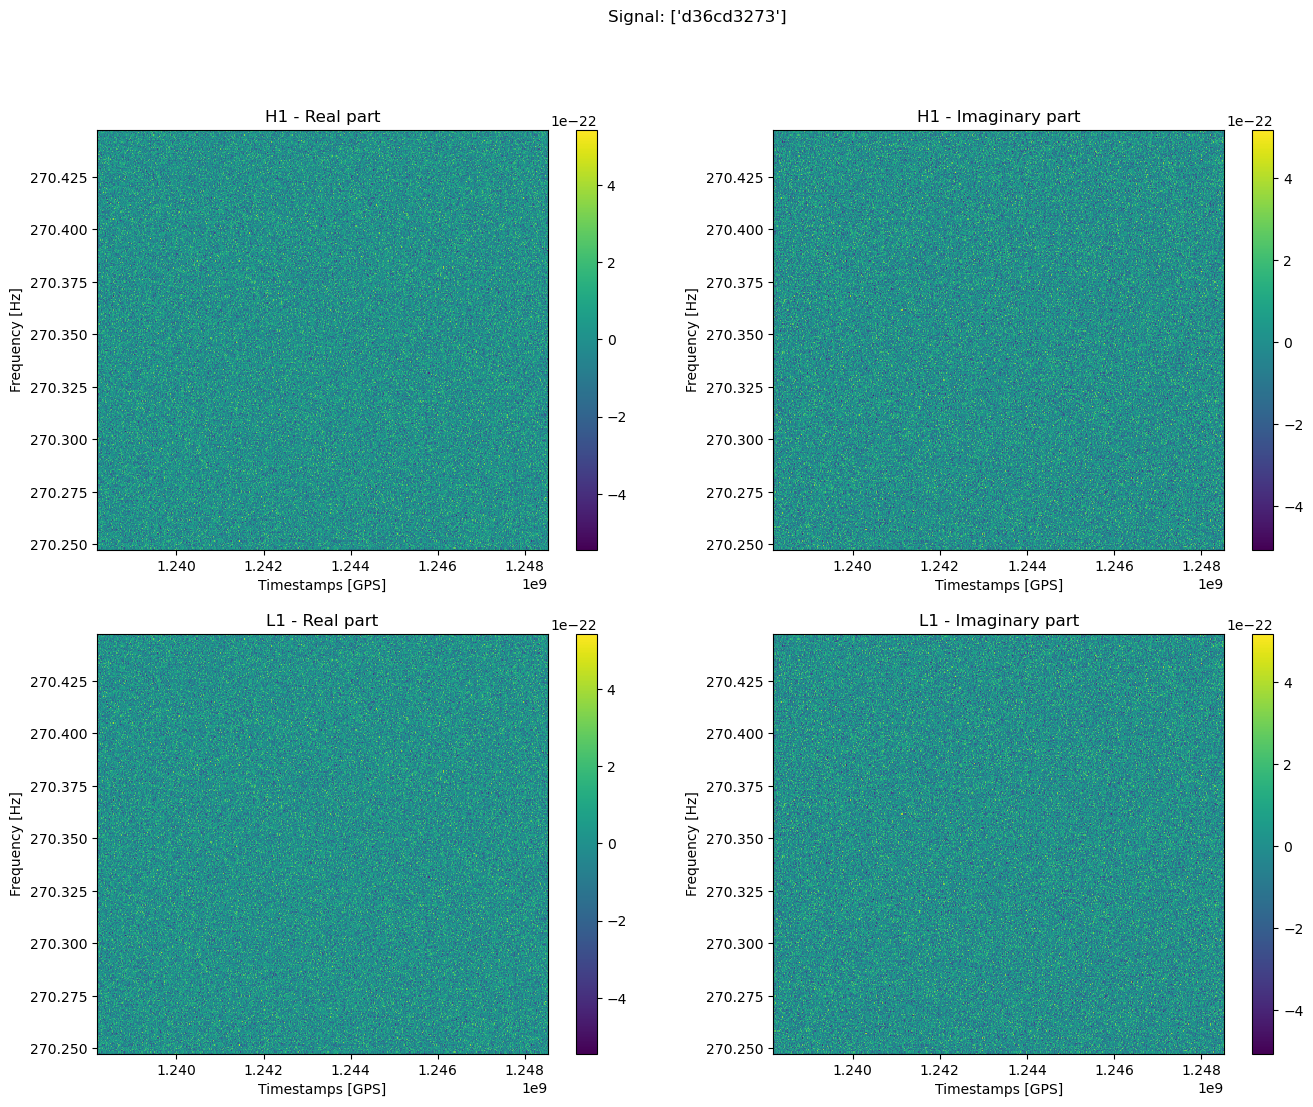



file: 7eb5e6d9e.hdf5
h1_sfts: 4563 arrays made of 360 complex numbers each one
h1_tgps: 4563 real numbers
l1_sfts: 4505 arrays made of 360 complex numbers each one
l1_tgps: 4505 real numbers
frequency: 360 real numbers


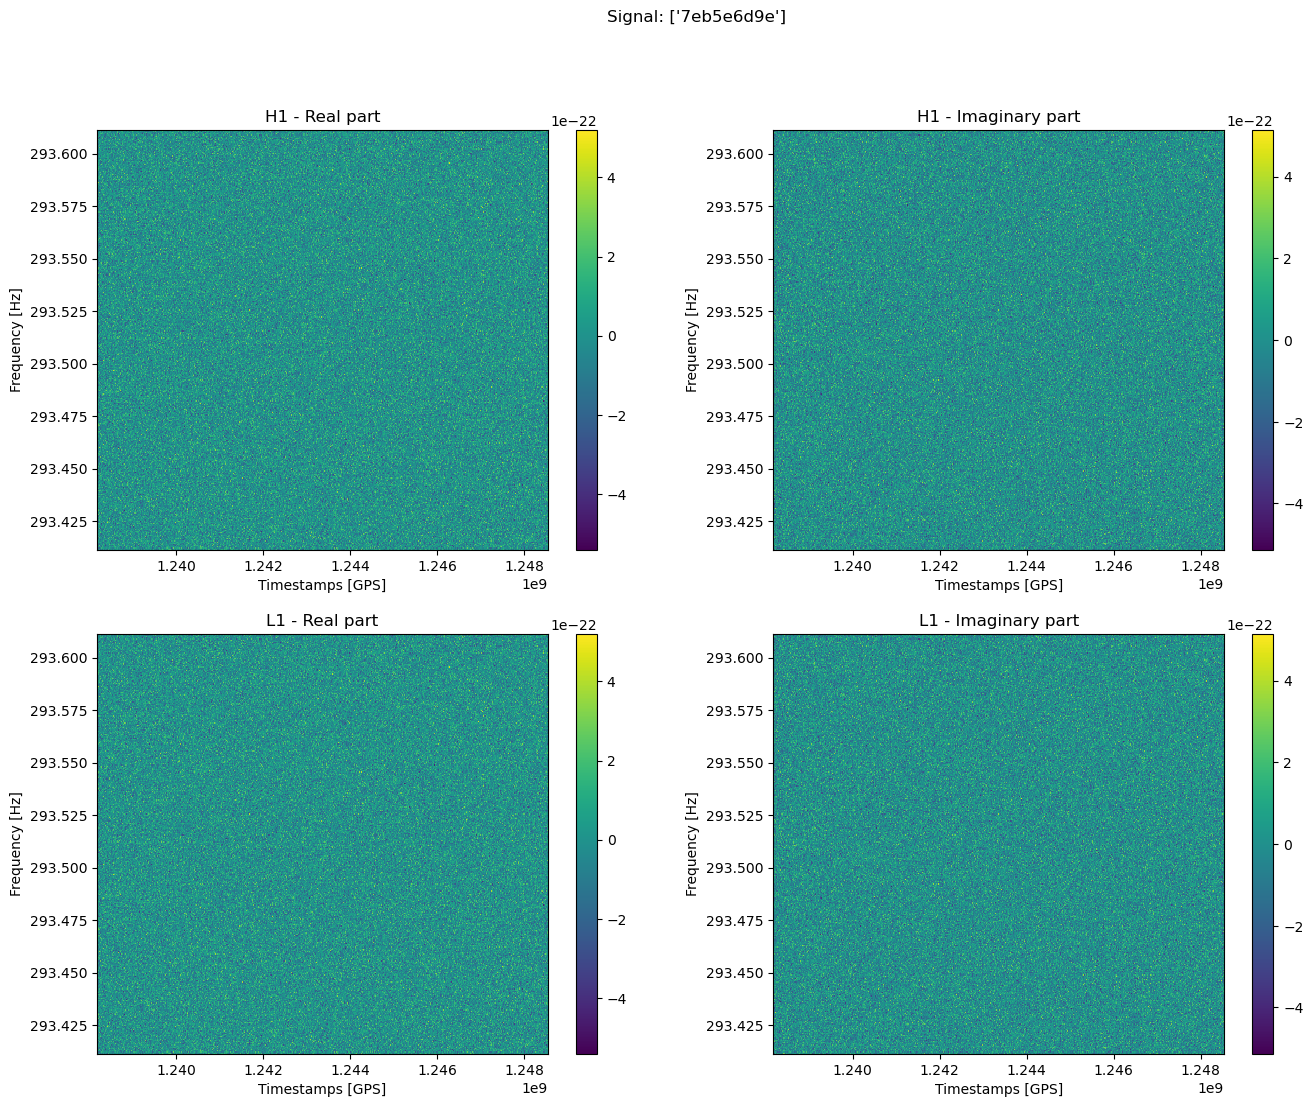



file: ac27a93df.hdf5
h1_sfts: 4671 arrays made of 360 complex numbers each one
h1_tgps: 4671 real numbers
l1_sfts: 4552 arrays made of 360 complex numbers each one
l1_tgps: 4552 real numbers
frequency: 360 real numbers


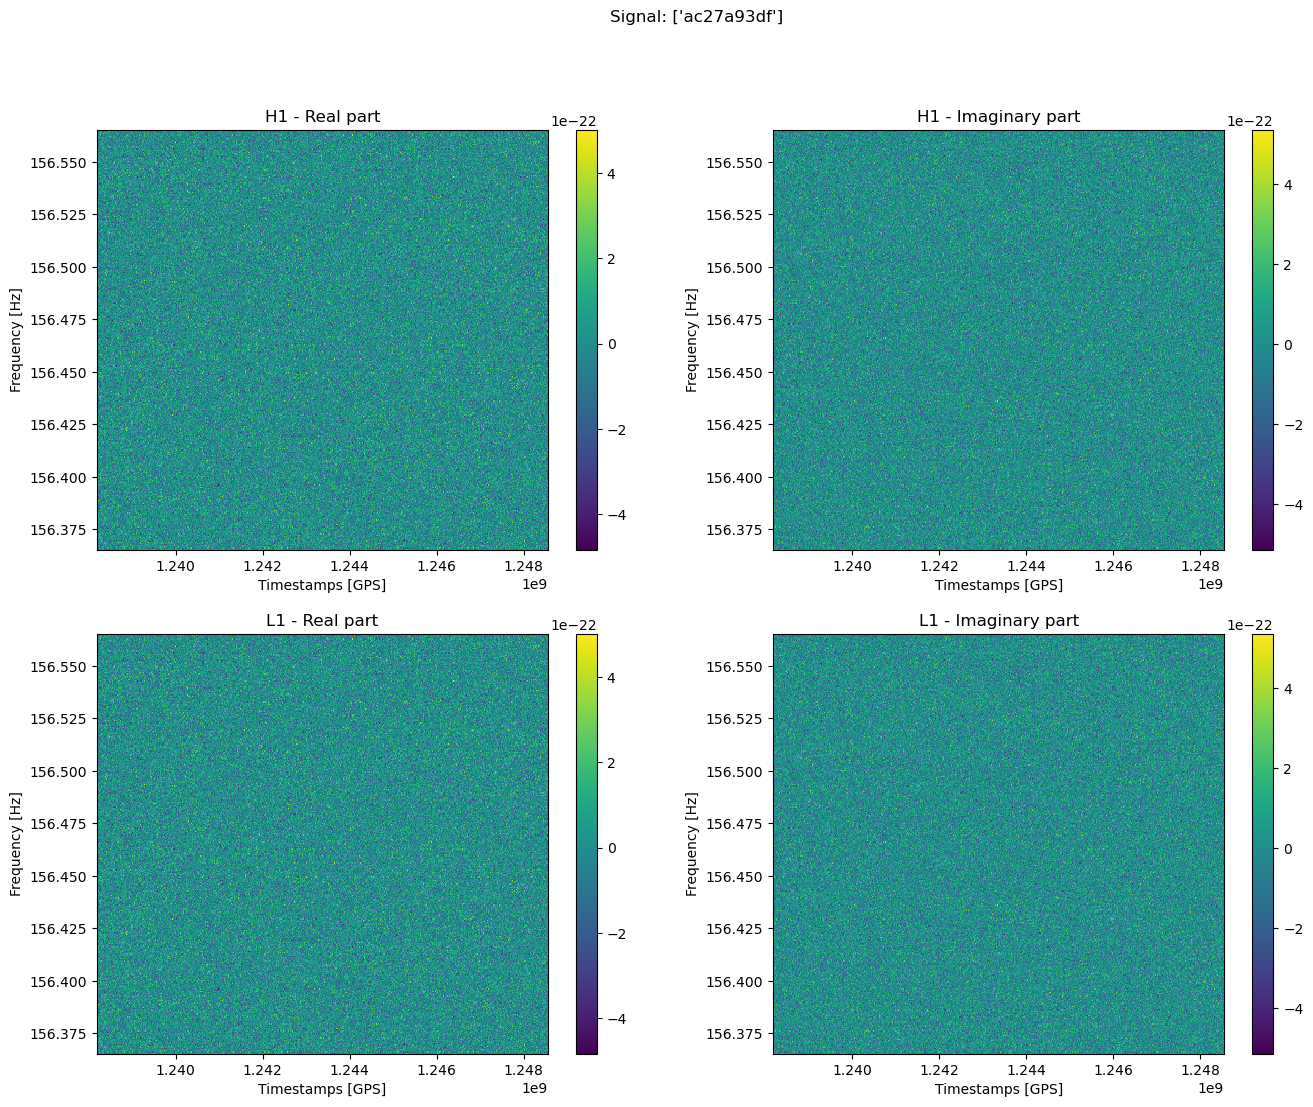



file: 67a833214.hdf5
h1_sfts: 4551 arrays made of 360 complex numbers each one
h1_tgps: 4551 real numbers
l1_sfts: 4424 arrays made of 360 complex numbers each one
l1_tgps: 4424 real numbers
frequency: 360 real numbers


In [ ]:

for z in range(10):
    ### Loading one file
    filename = mypath+onlyfiles[z]
    f        = h5py.File(filename, 'r')
    
    ### Opening the 'folders' inside each file
    for event in list(f.keys()):
        dset = f[event]

        h1_sfts = dset['H1']['SFTs']
        h1_tgps = dset['H1']['timestamps_GPS']

        l1_sfts = dset['L1']['SFTs']
        l1_tgps = dset['L1']['timestamps_GPS']

        freq = dset['frequency_Hz']

    ### Printing shapes of each sub-file
    # print(dset.keys())
    # print(dset['H1'].keys())
    # print(dset['L1'].keys())
    print()
    print()
    print(f"file: {onlyfiles[z]}")
    print(f"h1_sfts: {h1_sfts.shape[1]} arrays made of {h1_sfts.shape[0]} complex numbers each one")
    print(f"h1_tgps: {h1_tgps.shape[0]} real numbers")

    print(f"l1_sfts: {l1_sfts.shape[1]} arrays made of {l1_sfts.shape[0]} complex numbers each one")
    print(f"l1_tgps: {l1_tgps.shape[0]} real numbers")

    print(f"frequency: {freq.shape[0]} real numbers")

    
    ### Plotting the result
    fig, ax = plt.subplots(2,2,figsize=(16,12))

    fig.suptitle(f'Signal: {list(f.keys())}')

    detectors = ['H1','L1']
    for d_ind, detector in enumerate(detectors):
        ax[d_ind][0].set(xlabel="Timestamps [GPS]",
                                 ylabel="Frequency [Hz]",
                                 title=f"{detector} - Real part")
        ax[d_ind][1].set(xlabel="Timestamps [GPS]",
                                 ylabel="Frequency [Hz]",
                                 title=f"{detector} - Imaginary part")


        real = ax[d_ind][0].pcolormesh(h1_tgps,freq,h1_sfts[:,:].real)
        imag = ax[d_ind][1].pcolormesh(h1_tgps,freq,h1_sfts[:,:].imag)

        fig.colorbar(real, ax=ax[d_ind][0])
        fig.colorbar(imag, ax=ax[d_ind][1])
    plt.show()


In [ ]:

# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from tensorflow.keras.models import Model # for creating a Neural Network Autoencoder model
from tensorflow.keras import Input # for instantiating a keras tensor
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization # for adding layers to DAE model
from tensorflow.keras.utils import plot_model # for plotting model diagram

# Data manipulation
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

# Visualization
import matplotlib 
import matplotlib.pyplot as plt # for plotting model loss
print('matplotlib: %s' % matplotlib.__version__) # print version
import graphviz # for showing model diagram
print('graphviz: %s' % graphviz.__version__) # print version

# Other utilities
import sys
import os

# Assign main directory to a variable
main_dir=os.path.dirname(sys.path[0])
print(main_dir)


Next, we load MNIST handwritten digit data and display the first ten digits. Note, we could drop the labels since we are not using them in our model, but I kept them, so we know what the digits are for harder to read ones.

In [ ]:

# Load digits data 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

# Normalize (divide by 255) input data
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Display images of the first 10 digits in the training set and their true lables
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_train[n])
        axs[i,j].set(title=y_train[n])
        n=n+1
plt.show() 


In [ ]:
y_train.mean()

As you can see, we have 60,000 images in the training set and 10,000 in the test set. Note that their dimensions are 28 x 28 pixels.
Now is the time to add some noise to our images. Using the below code, you can specify the level of noise, which of course, impacts the final model. The more noise we add, the harder it will be for the model to clean it up.

In [ ]:

# Specify how much noise to add
level_of_noise=0.5

# Add random noise based on sampling from Gaussian distribution
X_train_noisy = X_train + level_of_noise * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + level_of_noise * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

# Enforce min-max boundaries so it does not go beyond [0,1] range
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display images of the first 10 digits in the noisy training data
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_train_noisy[n])
        axs[i,j].set(title=y_train[n])
        n=n+1
plt.show() 


In most cases, the numbers are still readable, but it has become significantly harder to say what number it is.

The final step before building a DAE is to reshape our inputs. The reason for flattening our images is because, in this example, we will make a standard DAE, not a Convolutional DAE.

In [ ]:

# Reshape input data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train_noisy = X_train_noisy.reshape(60000, 784)
X_test_noisy = X_test_noisy.reshape(10000, 784)

# Print shapes
print("New shape of X_train: ", X_train.shape)
print("New shape of X_test: ", X_test.shape)

print("New shape of X_train_noisy: ", X_train_noisy.shape)
print("New shape of X_test_noisy: ", X_test_noisy.shape)


# Building a DAE

Now we will assemble and train our DAE Neural Network. We can do it using the Keras Sequential model or Keras Functional API. I chose to use the latter in the below example.

Note that I have kept the same number of neurons (784) in every layer and added L1 regularisation in the middle layer to control overfitting. However, this model is by no means optimal, so you should only use it as a starting point for experimenting with different structures and hyperparameters.

In [ ]:

#--- Define Shapes
n_inputs=X_train.shape[1] # number of input neurons = the number of features X_train

#--- Input Layer 
visible = Input(shape=(n_inputs,), name='Input-Layer') # Specify input shape

#--- Encoder Layer
e = Dense(units=n_inputs, name='Encoder-Layer')(visible)
e = BatchNormalization(name='Encoder-Layer-Normalization')(e)
e = LeakyReLU(name='Encoder-Layer-Activation')(e)

#--- Middle Layer
middle = Dense(units=n_inputs, activation='linear', activity_regularizer=keras.regularizers.L1(0.0001), name='Middle-Hidden-Layer')(e)

#--- Decoder Layer
d = Dense(units=n_inputs, name='Decoder-Layer')(middle)
d = BatchNormalization(name='Decoder-Layer-Normalization')(d)
d = LeakyReLU(name='Decoder-Layer-Activation')(d)

#--- Output layer
output = Dense(units=n_inputs, activation='sigmoid', name='Output-Layer')(d)

# Define denoising autoencoder model
model = Model(inputs=visible, outputs=output, name='Denoising-Autoencoder-Model')

# Compile denoising autoencoder model
model.compile(optimizer='adam', loss='mse')

# Print model summary
print(model.summary())

# Plot the denoising autoencoder model diagram
plot_model(model, to_file=main_dir+'/pics/Denoising_Autoencoder.png', show_shapes=True, dpi=300)


With the model assembled, let’s train it over twenty epochs and plot the loss chart.

In [ ]:

# Fit the Denoising autoencoder model to reconstruct original images
history = model.fit(X_train_noisy, X_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test_noisy, X_test))

# Plot a loss chart
fig, ax = plt.subplots(figsize=(16,9), dpi=300)
plt.title(label='Model Loss by Epoch', loc='center')

ax.plot(history.history['loss'], label='Training Data', color='black')
ax.plot(history.history['val_loss'], label='Test Data', color='red')
ax.set(xlabel='Epoch', ylabel='Loss')
plt.xticks(ticks=np.arange(len(history.history['loss'])), labels=np.arange(1, len(history.history['loss'])+1))
plt.legend()

plt.show()


Finally, the time has come to evaluate our model visually. We will use the test dataset and display ten images from original, noisy, and denoised sets for comparison.


In [ ]:

# Reshape back
X_test_back = X_test.reshape(10000, 28, 28)

# Display images of the first 10 digits
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_test_back[n])
        axs[i,j].set(title=y_test[n])
        n=n+1
plt.show() 


In [ ]:

# Reshape back
X_test_noisy_reshaped = X_test_noisy.reshape(10000, 28, 28)

# Display images of the first 10 digits
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_test_noisy_reshaped[n])
        axs[i,j].set(title=y_test[n])
        n=n+1
plt.show() 


In [ ]:

# Apply denoising model 
#X_train_denoised = model.predict(X_train_noisy).reshape(60000, 28, 28)
X_test_denoised = model.predict(X_test_noisy).reshape(10000, 28, 28)

# Display images of the first 10 digits
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_test_denoised[n])
        axs[i,j].set(title=y_test[n])
        n=n+1
plt.show() 
